<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictions" data-toc-modified-id="Predictions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictions</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#IRIS" data-toc-modified-id="IRIS-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>IRIS</a></span></li></ul></li><li><span><a href="#Weights" data-toc-modified-id="Weights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Weights</a></span><ul class="toc-item"><li><span><a href="#MNIST-model-weights" data-toc-modified-id="MNIST-model-weights-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MNIST model weights</a></span></li><li><span><a href="#Iris-Model-Weights" data-toc-modified-id="Iris-Model-Weights-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Iris Model Weights</a></span></li></ul></li><li><span><a href="#Morse-Graphs" data-toc-modified-id="Morse-Graphs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Morse Graphs</a></span><ul class="toc-item"><li><span><a href="#MNIST-Morse-Graphs" data-toc-modified-id="MNIST-Morse-Graphs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST Morse Graphs</a></span></li><li><span><a href="#Iris-Morse-Graphs" data-toc-modified-id="Iris-Morse-Graphs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Iris Morse Graphs</a></span></li><li><span><a href="#Supplementary-histograms-of-model-weights" data-toc-modified-id="Supplementary-histograms-of-model-weights-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Supplementary histograms of model weights</a></span></li></ul></li></ul></div>

In [3]:
# basics
import os
import time
import numpy as np
import pandas as pd

# scipy and sklearn
from scipy.stats import entropy
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.display import Image
from matplotlib.patches import Rectangle

# CMDGB
from CMGDB import PlotMorseSets, PlotMorseGraph

# local
from data_loaders import retrieve_predictions
from models import *
from utils import get_model_weights, convert_weight_dict_to_dataframe, compute_morse_graph, \
                  compute_morse_graph_with_gpflow_gp, compute_order_retraction

sns.set()
plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Morse Graphs

## MNIST Morse Graphs

-------------------- Retriving model parameters: mnist_baseline --------------------
-------------------- Weights loaded, computing Morse Graph --------------------
[-0.02433765  0.51150949]
-------------------- Conducting Order Retraction --------------------


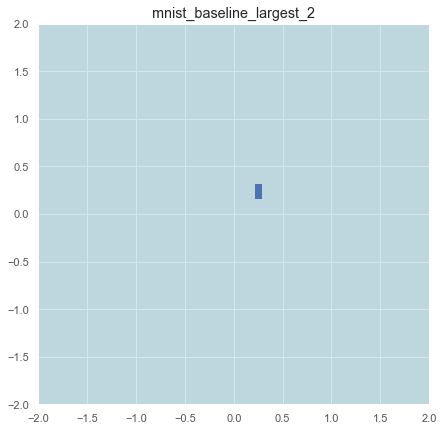

-------------------- Retriving model parameters: mnist_layers_2 --------------------
-------------------- Weights loaded, computing Morse Graph --------------------
[-0.01938511  0.50773076]
-------------------- Conducting Order Retraction --------------------


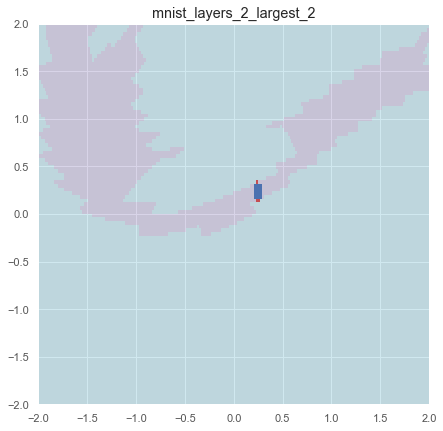

-------------------- Retriving model parameters: mnist_epoch_8 --------------------
-------------------- Weights loaded, computing Morse Graph --------------------
[0.00944872 0.51557251]
-------------------- Conducting Order Retraction --------------------


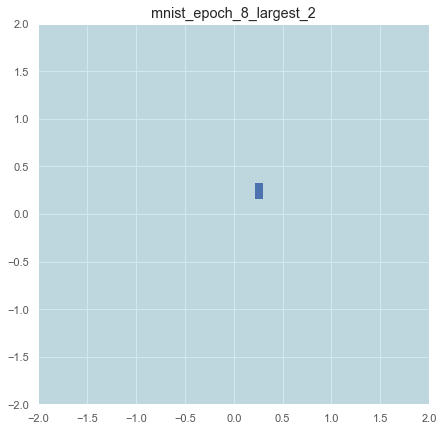

-------------------- Retriving model parameters: mnist_epoch_16 --------------------
-------------------- Weights loaded, computing Morse Graph --------------------
[0.20211877 0.52570772]
-------------------- Conducting Order Retraction --------------------


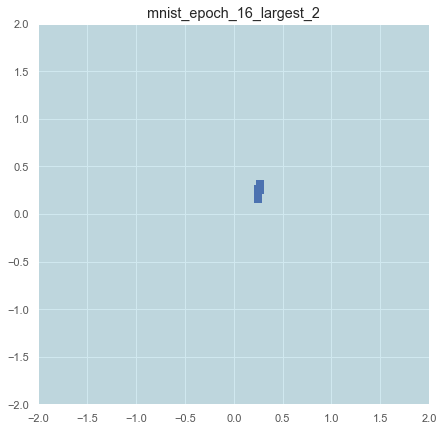

In [10]:
interesting_mnist = ["mnist_baseline", "mnist_layers_2", "mnist_epoch_8", "mnist_epoch_16"]

morse_graph_dict_mnist = {}
map_graph_dict_mnist = {}
for im in interesting_mnist:
    print("-"*20,'Retriving model parameters:',im,"-"*20)
    weights = get_model_weights("/Volumes/GoogleDrive/Shared drives/Deep Chaos/data/mg_nips_data/data/{}".format(im))
    weights = convert_weight_dict_to_dataframe(weights)
    
    final_weights = weights.loc[weights["epoch"] != "1"]    
    weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
    std_df = pd.DataFrame(columns=["weight_name", "std"],
                          data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
    std_df = std_df.sort_values(by="std")
#     smallest_2 = list(std_df["weight_name"])[:2]
    largest_2 = list(std_df["weight_name"])[-2:]
    print("-"*20,'Weights loaded, computing Morse Graph',"-"*20)
#     morseg_small, mapg_small = compute_morse_graph(weights[['epoch'] + smallest_2], phase_subdiv=15)
    morseg_large, mapg_large = compute_morse_graph(weights[['epoch'] + largest_2], phase_subdiv=15)
    
#     morse_graph_dict_mnist["{}_smallest_2".format(im)] = morseg_small
    morse_graph_dict_mnist["{}_largest_2".format(im)] = morseg_large
    
#     map_graph_dict_mnist["{}_smallest_2".format(im)] = mapg_small
    map_graph_dict_mnist["{}_largest_2".format(im)] = mapg_large

    print("-"*20,'Conducting Order Retraction',"-"*20)

#     compute_order_retraction(morseg_small, mapg_small, title="{}_smallest_2".format(im))
    compute_order_retraction(morseg_large, mapg_large, title="{}_largest_2".format(im))

    plt.show()
#     break

mnist_baseline_largest_2


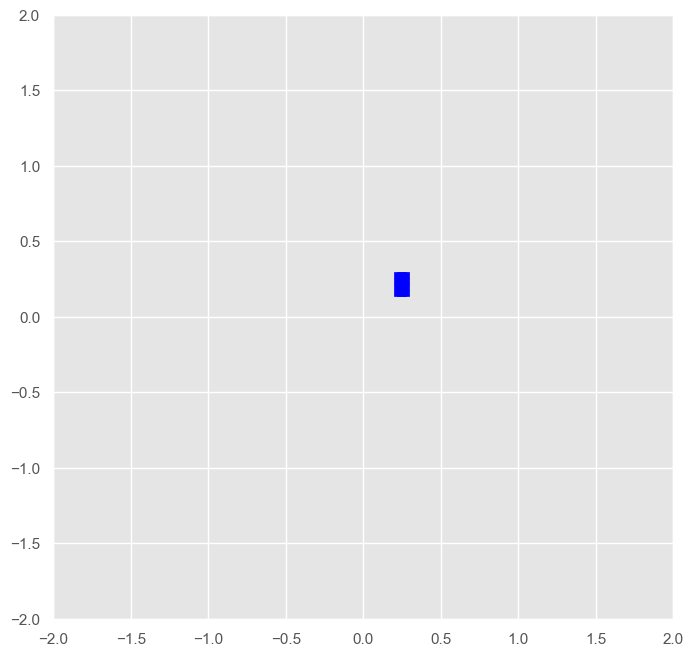

mnist_layers_2_largest_2


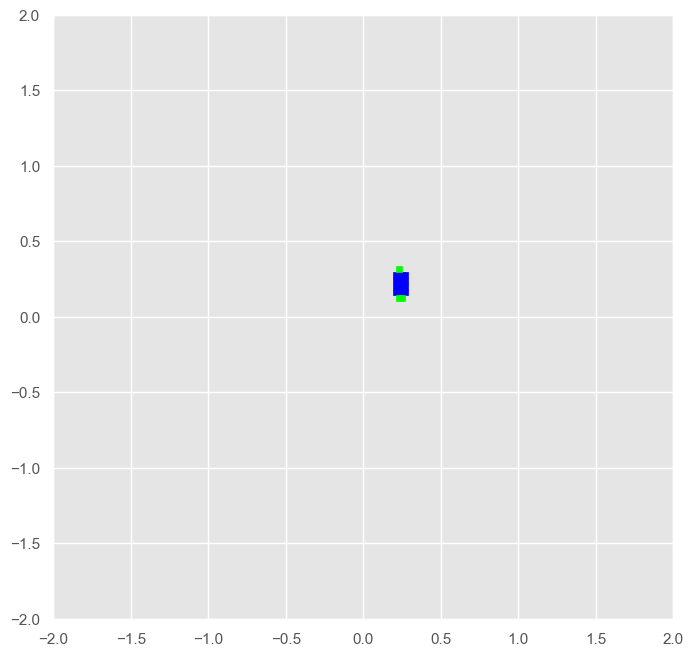

mnist_epoch_8_largest_2


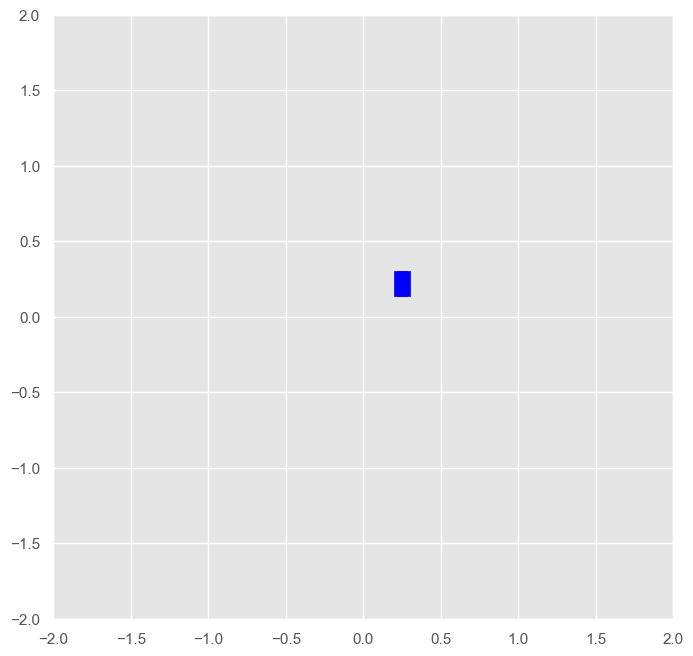

mnist_epoch_16_largest_2


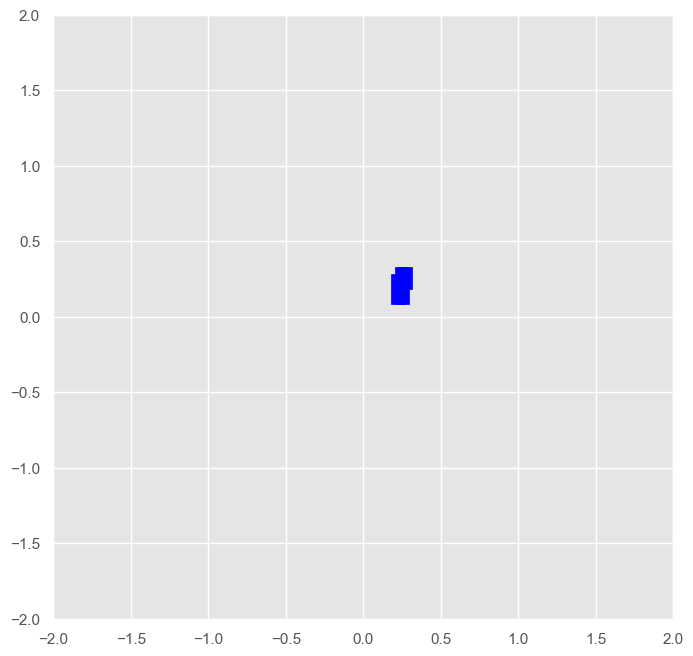

In [11]:
# plot distribution of two weights that you are using to see if they are actually ending up where the plots below show


for key, value in morse_graph_dict_mnist.items():
    print(key)
    PlotMorseSets(value, xlim=[-2, 2], ylim=[-2, 2])

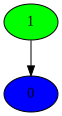

In [14]:
PlotMorseGraph(morse_graph_dict_mnist["mnist_layers_2_largest_2"])

## Iris Morse Graphs

In [ ]:
interesting_iris = ["iris_baseline", "iris_layers_2", "iris_epoch_450"]

morse_graph_dict_iris = {}
map_graph_dict_iris = {}
for ii in interesting_iris:
    weights = get_model_weights("./data/{}".format(ii))
    weights = convert_weight_dict_to_dataframe(weights)
    
    final_weights = weights.loc[weights["epoch"] != "1"]  
    weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
    std_df = pd.DataFrame(columns=["weight_name", "std"],
                          data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
    std_df = std_df.sort_values(by="std")
    smallest_2 = list(std_df["weight_name"])[:2]
    largest_2 = list(std_df["weight_name"])[-2:]

    morseg_small, mapg_small = compute_morse_graph(weights[['epoch'] + smallest_2], phase_subdiv=15)
    morseg_large, mapg_large = compute_morse_graph(weights[['epoch'] + largest_2], phase_subdiv=15)
    
    morse_graph_dict_iris["{}_smallest_2".format(ii)] = morseg_small
    morse_graph_dict_iris["{}_largest_2".format(ii)] = morseg_large
    
    map_graph_dict_iris["{}_smallest_2".format(ii)] = mapg_small
    map_graph_dict_iris["{}_largest_2".format(ii)] = mapg_large
    
    compute_order_retraction(morseg_small, mapg_small, title="{}_smallest_2".format(ii))
    compute_order_retraction(morseg_large, mapg_large, title="{}_largest_2".format(ii))    
    
    plt.show()

In [ ]:
for key, value in morse_graph_dict_iris.items():
    print(key)
    PlotMorseSets(value, xlim=[-2, 2], ylim=[-2, 2])

In [ ]:
PlotMorseGraph(morse_graph_dict_iris["iris_baseline_smallest_2"])

## Supplementary histograms of model weights

In [ ]:
# for im in interesting_mnist:
#     weights = get_model_weights("./data/{}".format(im))
#     weights = convert_weight_dict_to_dataframe(weights)
    
#     final_weights = weights.loc[weights["epoch"] != "1"]    
#     weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
#     std_df = pd.DataFrame(columns=["weight_name", "std"],
#                           data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
#     std_df = std_df.sort_values(by="std")
#     smallest_2 = list(std_df["weight_name"])[:2]
#     largest_2 = list(std_df["weight_name"])[-2:]
    
#     for w in smallest_2 + largest_2:
#         std = np.std(final_weights[w])
#         figure = plt.figure()
#         ax = sns.distplot(final_weights[w], norm_hist=False, kde=False)
#         ax.set_title("{} (Std = {:.2f})".format(w, std))

In [ ]:
# for ii in interesting_iris:
#     weights = get_model_weights("./data/{}".format(ii))
#     weights = convert_weight_dict_to_dataframe(weights)
    
#     final_weights = weights.loc[weights["epoch"] != "1"]  
#     weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
#     std_df = pd.DataFrame(columns=["weight_name", "std"],
#                           data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
#     std_df = std_df.sort_values(by="std")
#     smallest_2 = list(std_df["weight_name"])[:2]
#     largest_2 = list(std_df["weight_name"])[-2:]

#     for w in smallest_2 + largest_2:
#         std = np.std(final_weights[w])
#         figure = plt.figure()
#         ax = sns.distplot(final_weights[w], norm_hist=False, kde=False)
#         ax.set_title("{} (Std = {:.2f})".format(w, std))